In [1]:
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.regression import LabeledPoint

from pyspark.mllib.tree import GradientBoostedTrees, GradientBoostedTreesModel
from pyspark.mllib.tree import RandomForest, RandomForestModel

from pyspark.mllib.util import MLUtils

%pylab inline

import numpy as np
from time import time

import sys,os,pickle
sys.path.insert(0, os.path.abspath('../src'))

from BoostStumps import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pyspark import SparkContext

#sc=SparkContext()

from numpy.random import rand
p=1
data=[]
size=10
print '   '+''.join(["%2.0f "%i for i in range(size)])
for i in range(size):
    print "%2.0f "%i,
    for j in range(size):
        if np.abs(i-size/4)<size/5 and np.abs(j-size/2)<size/5:
            y=2*(rand()<p)-1
        else:
            y=2*(rand()>p)-1
        print "%1.0f "%((1+y)/2),
        data.append(LabeledPoint(y,[i,j]))
    print

    0  1  2  3  4  5  6  7  8  9 
 0  0  0  0  0  0  0  0  0  0  0 
 1  0  0  0  0  1  1  1  0  0  0 
 2  0  0  0  0  1  1  1  0  0  0 
 3  0  0  0  0  1  1  1  0  0  0 
 4  0  0  0  0  0  0  0  0  0  0 
 5  0  0  0  0  0  0  0  0  0  0 
 6  0  0  0  0  0  0  0  0  0  0 
 7  0  0  0  0  0  0  0  0  0  0 
 8  0  0  0  0  0  0  0  0  0  0 
 9  0  0  0  0  0  0  0  0  0  0 


In [3]:
dataRDD=sc.parallelize(data,numSlices=2)
dataRDD.getNumPartitions()

2

In [4]:
sc

In [6]:
booster=Booster(sc,dataRDD,no_of_bins=20)

number of features= 2 number of partitions= 2
Sizes: Data1=100, trainingData=66, testData=34
number of elements in GR= 2
number of elements in GTR= 2
GR no of partitions 2
number of partitions in PS= 2


In [7]:
#print booster.report_times()

In [8]:
Scores=[]
for i in range(10):
    booster.boosting_iteration()
    Scores.append(booster.compute_scores())

Training Error: 0  ,iteration:  0  ,split index:  1   ,gamma:  0.5  ,bound:  0.606530659713
Training Error: 0  ,iteration:  1  ,split index:  0   ,gamma:  0.5  ,bound:  0.367879441171
Training Error: 0  ,iteration:  2  ,split index:  0   ,gamma:  0.5  ,bound:  0.223130160148
Training Error: 0  ,iteration:  3  ,split index:  0   ,gamma:  0.5  ,bound:  0.135335283237
Training Error: 0  ,iteration:  4  ,split index:  0   ,gamma:  0.5  ,bound:  0.0820849986239
Training Error: 0  ,iteration:  5  ,split index:  0   ,gamma:  0.5  ,bound:  0.0497870683679
Training Error: 0  ,iteration:  6  ,split index:  0   ,gamma:  0.5  ,bound:  0.0301973834223
Training Error: 0  ,iteration:  7  ,split index:  0   ,gamma:  0.5  ,bound:  0.0183156388887
Training Error: 0  ,iteration:  8  ,split index:  0   ,gamma:  0.5  ,bound:  0.0111089965382
Training Error: 0  ,iteration:  9  ,split index:  0   ,gamma:  0.5  ,bound:  0.00673794699909


In [50]:
#print booster.report_times()

In [51]:
prev_best=-1
for i in range(len(booster.proposals)):
    iteration_data=booster.proposals[i]
    best_feature=iteration_data['best feature']
    print '-'*50,i,best_feature
    if prev_best>-1:
        print 'corr of prev best',iteration_data['details'][prev_best]['SS'][prev_best_threshold_index]
    print best_feature,iteration_data['details'][best_feature]
    prev_best=best_feature
    prev_best_threshold_index=iteration_data['details'][prev_best]['Threshold_index']

-------------------------------------------------- 0 1
1 {'SS': array([ 1.        ,  1.        ,  0.67741935,  0.48387097,  0.48387097,
        0.29032258,  0.16129032,  0.16129032, -0.09677419, -0.29032258,
       -0.29032258, -0.5483871 , -0.5483871 , -0.74193548, -0.87096774, -1.        ]), 'Correlation': 1.0, 'Threshold': 0.0, 'alpha': inf, 'Feature_index': 1, 'Threshold_index': 0}
-------------------------------------------------- 1 0
corr of prev best nan
0 {'SS': array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan]), 'Correlation': nan, 'Threshold': 0.0, 'alpha': nan, 'Feature_index': 0, 'Threshold_index': 0}
-------------------------------------------------- 2 0
corr of prev best nan
0 {'SS': array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan]), 'Correlation': nan, 'Threshold': 0.0, 'alpha': nan, 'Feature_index': 0, 'Threshold_index': 0}
---------------

In [ ]:
print booster.proposals

In [52]:
booster.Strong_Classifier

[{'Correlation': 1.0,
  'Feature_index': 1,
  'SS': array([ 1.        ,  1.        ,  0.67741935,  0.48387097,  0.48387097,
          0.29032258,  0.16129032,  0.16129032, -0.09677419, -0.29032258,
         -0.29032258, -0.5483871 , -0.5483871 , -0.74193548, -0.87096774, -1.        ]),
  'Threshold': 0.0,
  'Threshold_index': 0,
  'alpha': inf},
 {'Correlation': nan,
  'Feature_index': 0,
  'SS': array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan]),
  'Threshold': 0.0,
  'Threshold_index': 0,
  'alpha': nan},
 {'Correlation': nan,
  'Feature_index': 0,
  'SS': array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan]),
  'Threshold': 0.0,
  'Threshold_index': 0,
  'alpha': nan},
 {'Correlation': nan,
  'Feature_index': 0,
  'SS': array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan]),
  'Threshold':

In [56]:
trainScores=[]
for train,test in Scores:
    trainScores.append(train.flatMap(lambda A:list(A)).collect())
len(trainScores)

10

In [57]:
scoresArray=np.stack(trainScores)
shape(scoresArray)

(10, 65)

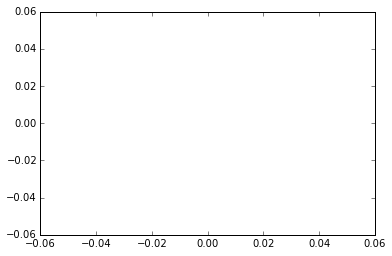

In [55]:
plot(scoresArray);

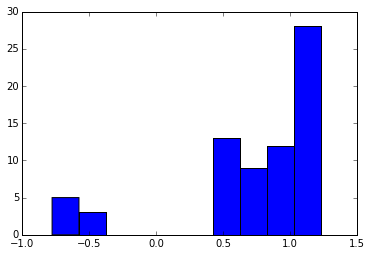

In [43]:
hist(scoresArray[9,:]);

In [9]:
!ls ../src/

BoostStumps.py   BoostStumps.pyc  Muffled-Learning docs


In [ ]:
# %load ../src/BoostStumps.py
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.regression import LabeledPoint

from pyspark.mllib.tree import GradientBoostedTrees, GradientBoostedTreesModel
from pyspark.mllib.tree import RandomForest, RandomForestModel

from pyspark.mllib.util import MLUtils

import math
import numpy as np
from numpy.random import rand

from time import time

from pyspark import SparkContext


class Timer:
    """A simple service class to log run time and pretty-print it.
    """
    def __init__(self):
        self.T=[]
    def stamp(self,name):
        self.T.append((name,time()))
    def str(self):
        T=self.T
        return '\n'.join(['%6.2f : %s'%(T[i+1][1]-T[i][1],T[i+1][0]) for i in range(len(T)-1)])

class Booster:

#######################################################################

    def __init__(self,sc,Data,no_of_bins=10):
        """ Given an RDD with labeled Points, create the RDD of data structures used for boosting

        :param sc: SparkContext
        :param Data: The input RDD

        :creates: the self data structures used for boosting :
                  T: timestamps
                  GR:  RDD for training set
                  GTR: RDD for test set
                  PS: an array of training set RDDs, one per boosting iteration.
                  Splits: A list of numpy arrays, holding the split points
                  Strong_Classifier: A list of weak classifiers.
        """
        self.sc=sc 
        self.T=Timer()
        self.T.stamp('Started')

        X=Data.first()
        self.feature_no=len(X.features)
        feature_no=self.feature_no
        partition_no=Data.getNumPartitions()
        if partition_no != self.feature_no:
            Data=Data.repartition(feature_no).cache()
        print 'number of features=',self.feature_no,'number of partitions=',Data.getNumPartitions()

        self.iteration=0

        # Split data into training and test
        (trainingData,testData)=Data.randomSplit([0.7,0.3])
        print 'Sizes: Data1=%d, trainingData=%d, testData=%d'%\
            (Data.count(),trainingData.cache().count(),testData.cache().count())
        self.T.stamp('Split into train and test')
        # Glom each partition into a local array
        G=trainingData.glom()
        GTest=testData.glom()  
        self.T.stamp('glom')

        # Add an index to each partition to identify it.
        def f(splitIndex, iterator): yield splitIndex,iterator.next()
        GI=G.mapPartitionsWithIndex(f) # RDD containing training data (glomed and indexed)
        GTI=GTest.mapPartitionsWithIndex(f) #  RDD containing test data (glomed and indexed)
        self.T.stamp('add partition index')

        self.Prepare_data_structure(GI,GTI)
        self.find_splits(no_of_bins)
        self.Add_Weak_structures()

        self.Strong_Classifier=[]
        self.proposals=[]
        self.Training_Error=[] #added
        self.gamma=[] #added
        self.sum_gamma=0
        self.T.stamp('Finished Initialization')

    ######################################################################################

    def report_times(self):
        """return a string reporting the time stamps, use with "print"

        :returns: the time stamps
        :rtype: a string

        """
        return self.T.str()

    ######################################################################################
    def Prepare_data_structure(self,GI,GTI):
        """ Create a data structure for each glomed partition 

        :param GI: Glomed training set RDD
        :param GTI: Glomed test set RDD

        :creates: self.GR: RDD for training set (will have weak matrix added)
                  self.GTR: RDD for test set (will be used as is to compute test error).

        """
        def Prepare_partition_data_structure(A):
            """
            :param A: A glomed partition
            :returns: A partition data structure (missing the weak matrix which is added later)

                    'index':The partition index (used to differentiate btwn partitions)
                    'labels': An array of labels (-1/+1) one for each example
                    'weights': An array of weights. one for each example
                    'feature_values': A matrix of feature values (shape is [feature_no,rows])

            :rtype: dict

            """

            rows=len(A[1])

            columns=np.empty([feature_no,rows])
            columns[:]=np.NaN
            print 'Prepare_partition_data_structure',feature_no,np.shape(columns)

            labels=np.empty(rows)
            labels[:]=np.NaN

            for j in range(rows):
                LP=A[1][j]
                labels[j]=LP.label
                for i in range(feature_no):
                    columns[i,j]=LP.features[i]
            return {'index':A[0],\
                    'labels':labels,\
                    'weights':np.ones(len(labels)),\
                    'feature_values':columns}
        #=========================================================================

        feature_no=self.feature_no

        # Prepare the train and test data structures for each partition.
        self.GR=GI.map(Prepare_partition_data_structure)
        self.GTR=GTI.map(Prepare_partition_data_structure)

        print 'number of elements in GR=', self.GR.cache().count()
        print 'number of elements in GTR=', self.GTR.cache().count()
        self.T.stamp('Prepare_partition_data_structure')


  
    ##############################################################################
    def find_splits(self,number_of_bins=10):
        """Compute the split points for each feature to create number_of_bins bins

        :param number_of_bins: number of bins desired (default 10)
        
        :creates self.Splits: list of no_features numpy arrays, each
                              containing the number_of_bins+1 split
                              points (the last one is "infinity")
        """
        def find_split_points(A):
            """ A partition task: find the split points for a single feture whose index
            is A['index']%feature_no

            :param A: The partition data structure
            :returns: (feature index, split points)
            :rtype: tuple

            """
            j=A['index'] % feature_no
            S=np.sort(A['feature_values'][j,:])
            L=len(S) 
            step=int(np.ceil(float(L)/number_of_bins))
            return (j,S[range(step,L,step)])

        #=========================================================================
        #print 'no of bins', number_of_bins
        GR=self.GR
        feature_no=self.feature_no
        partition_no=GR.getNumPartitions()
        print 'GR no of partitions', partition_no
        Splits=GR.map(find_split_points).collect()
        #Splits=[]
        #for A in GR.collect():
        #    Splits.append(find_split_points(A))

        max_no=np.array([np.finfo(float).max]) # max_no is the maximal value represented by a float

        # Average the split points across the partitions corresponding to the same feature.
        Splits1=[]
        for i in range(feature_no):
            S=Splits[i][1]
            n=1  # number of copies (for averaging)
            j=i+feature_no
            while j<partition_no:
                S+=Splits[j][1]
                n+=1.0
                j+=feature_no
            Splits1.append(np.concatenate([S/n,max_no]))

        self.Splits=Splits1   # store split points array in self.Splits
        self.T.stamp('Compute Split points')

    #############################################################
    def Add_Weak_structures(self):
        """Create matrix for each partition to facilitate finding the weighted errors
        of the weak rules using a single matrix multiplication
        """
        def Add_weak_learner_matrix(A):
            """ This procedure adds to the partition data structure the weak-rule error matrix

            :param A: The partition data structure 

            :returns: input A with added field 'M'
            :rtype: dict
            """

            index=A['index']%feature_no
            Splits=BC_Splits.value[index]

            Col=A['feature_values'][index,:]

            ### The matrix M is organized as follows: 
            # * There are as many rows as there are thresholds in Splits (last one is inf)
            # * There are as many columns as there are examples in this partition.
            # For threshold i, the i'th rw of M is +1 
            #     if Col is smaller than the trehold Splits[i] and -1 otherwise

            M=np.empty([len(Splits),len(Col)])
            M[:]=np.NaN

            for i in range(len(Splits)):
                M[i,:]=2*(Col<Splits[i])-1

            A['M']=M # add M matrix to the data structure.
            return A
        #=========================================================================

        BC_Splits=self.sc.broadcast(self.Splits) #broadcast split points

        feature_no=self.feature_no

        self.PS=[None]
        
        self.PS[0]=self.GR.map(Add_weak_learner_matrix)
        #L=[]
        #for A in self.GR.collect():
        #    L.append(Add_weak_learner_matrix(A))
        #self.PS[0]=self.sc.parallelize(L)

        print 'number of partitions in PS=',self.PS[0].cache().count()
        self.T.stamp('Add_weak_learner_matrix')

    #############################################################
    def boosting_iteration(self):
        """perform one boosting iteration. Consisting of finding the lowest
        error weak rule , adding it, and updating the weights

        :updates: PS: appends a new RDD (all is the same other than the weight vector) to the end of the list
                  
        """
        def Find_weak(A):
            """Find the best split for a single feature on a single partition

            :param A: Partition data structure

            :returns: a dict describing the added weak classifier
                    'Feature_index':   the index of the best feature
                    'Threshold_index': the index of the best threshold (the split point)
                    'Threshold':       the value of the best threshold 
                    'Correlation':     the weighted correlation of the best weak rule
                    'SS':              the weighted correlations of all of the split points.
            :rtype: dict
            """
            index=A['index']%feature_no
            Splits=BC_Splits.value[index]

            M=A['M']
            weights=A['weights']
            weighted_Labels=weights*A['labels']
            SS=np.dot(M,weighted_Labels)/np.sum(weights)
            i_max=np.argmax(np.abs(SS))
            return {'Feature_index':A['index']%feature_no,\
                    'Threshold_index':i_max,\
                    'Threshold':Splits[i_max],\
                    'Correlation':SS[i_max],\
                    'SS':SS
                }

        def update_weights(A):
            """Update the weights of the examples belonging to this partition

            :param A: The partition data structure

            :returns: A partition data structure with updated weights
            :rtype: dict

            """
            best_splitter=BC_best_splitter.value

            F_index=best_splitter['Feature_index']
            Thr=best_splitter['Threshold']
            alpha=best_splitter['alpha']
            y_hat=2*(A['feature_values'][F_index,:]<Thr)-1
            y=A['labels']
            weights=A['weights']*np.exp(-alpha*y_hat*y)
            weights /= sum(weights)

            A['weights']=weights
            return A
        
        def find_Training_Error(A): ##added
            #error=0
            best_splitter=BC_best_splitter.value

            F_index=best_splitter['Feature_index']
            #print 'index' , F_index
            Thr=best_splitter['Threshold']
            #alpha=best_splitter['alpha']
            y_hat=2*(A['feature_values'][F_index,:]<Thr)-1
            y=A['labels']
            weights=A['weights']
            error=y_hat * y
            error=(error * weights)/sum(weights)
            error=error[error<0]
            return -1*sum(error)
            
            
            
        #=========================================================================

        i=self.iteration

        self.T.stamp('Start main loop %d'%i)

        feature_no=self.feature_no

        BC_Splits = self.sc.broadcast(self.Splits)
        prop=self.PS[i].map(Find_weak).collect()

        corrs=[p['Correlation'] for p in prop]
        best_splitter_index=np.argmax(np.abs(corrs))
        best_splitter = prop[best_splitter_index]
        self.proposals.append({'iter ':i,'best feature':best_splitter_index,'details':prop})

        corr=best_splitter['Correlation']
        best_splitter['alpha']=0.5*np.log((1+corr)/(1-corr))

        BC_best_splitter=self.sc.broadcast(best_splitter)
        self.Strong_Classifier.append(best_splitter)
        '''
        adict=self.PS[i].collect()
        a1=adict[best_splitter_index]
        if(best_splitter_index==0):
            c=1
        else:
            c=0
        a2=adict[c]
        print type(adict), type(a1),type(a2)
        weights1=a1['weights']
        weights2=a2['weights']
        wtest1=weights1[weights1<0]
        wtest2=weights2[weights2<0]
        #print 'weights1 ', len(weights1), 'weights_test ', len(wtest1) ,'weights2 ', len(weights2), 'weights_test 2', len(wtest2)
        #print 'final ', len(weights1)+len(weights2)
        #print 'sum ', sum(weights1)+sum(weights2)
        '''
        
        E=self.PS[i].map(find_Training_Error).collect()
        trainingError=E[best_splitter_index]
        
        gamma_t=0.5-trainingError
        self.Training_Error.append(trainingError)
        
        self.gamma.append(gamma_t)
        
        expo = self.sum_gamma + (gamma_t ** 2)
        self.sum_gamma=expo
        
        bound=math.exp(-2 * expo)
        
        #bound=0
        print "Training Error:", trainingError, ' ,iteration: ', self.iteration , ' ,split index: ' , best_splitter_index, '  ,gamma: ',gamma_t, " ,bound: ",bound
        
        BC_Strong_Classifier=self.sc.broadcast(self.Strong_Classifier)
        self.T.stamp('found best splitter %d'%i)

        newPS=self.PS[i].map(update_weights).cache()
        #L=[]
        #for A in self.PS[i].collect():
        #    L.append(update_weights(A))
        #newPS=self.sc.parallelize(L).cache()
        newPS.count()
        self.PS.append(newPS)
        
        
        self.T.stamp('Updated Weights %d'%i)
        self.iteration+=1


    #############################################################
    def compute_scores(self):

        def calc_scores(Strong_Classifier,Columns,Lbl):

            Scores=np.zeros(len(Lbl))

            for h in Strong_Classifier:
                index=h['Feature_index']
                Thr=h['Threshold']
                alpha=h['alpha']
                y_hat=2*(Columns[index,:]<Thr)-1
                Scores += alpha*y_hat*Lbl
            return Scores

        def get_scores(A):
            Strong_Classifier=BC_Strong_Classifier.value
            Scores = calc_scores(Strong_Classifier,A['feature_values'],A['labels'])
            return Scores
        #=========================================================================
        
        train_scores=self.GR.map(get_scores)
        test_scores=self.GTR.map(get_scores)
        return train_scores,test_scores


###################################################################
def generate_data(sc):
    p=0.9
    data=[]
    for i in range(10):
        for j in range(10):
            if np.abs(i-4)<3 and np.abs(j-6)<3:
                y=2*(rand()<p)-1
            else:
                y=2*(rand()>p)-1
            print "%1.0f "%((1+y)/2),
            data.append(LabeledPoint(y,[i,j]))
        print


    return sc.parallelize(data)
    

if __name__ == '__main__':
    sc=SparkContext()
    dataRDD = generate_data(sc)
    booster=Booster(sc,dataRDD)
    Scores=[]
    for i in range(10):
        booster.boosting_iteration()
        Scores.append(booster.compute_scores())
    


